In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv
/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv
/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv
/kaggle/input/ml-project/preprocessed_data.csv
/kaggle/input/ml-project/my_model_weights.h5
/kaggle/input/distilbert-model/model_checkpoint.h5
/kaggle/input/distilbert-model/distilbert_model_weights.h5
/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv
/kaggle/input/argugpt/argugpt.csv
/kaggle/input/argugpt/machine-dev.csv
/kaggle/input/argugpt/machine-test.csv
/kaggle/input/argugpt/machine-train.csv
/kaggle/input/llm-detection-cse-472/ker

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import nltk
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data_set = pd.read_csv("/kaggle/input/ml-project/preprocessed_data.csv")
data_set.head()

,generated,tokens,essay
0,0,"['phones', 'modern', 'humans', 'today', 'alway...",phones modern humans today always phone always...
1,0,"['essay', 'explain', 'drivers', 'able', 'use',...",essay explain drivers able use electronic devi...
2,0,"['driving', 'use', 'cellular', 'devices', 'tod...",driving use cellular devices today society tho...
3,0,"['phones', 'driving', 'drivers', 'able', 'use'...",phones driving drivers able use phones operati...
4,0,"['cell', 'phone', 'operation', 'driving', 'abi...",cell phone operation driving ability stay conn...


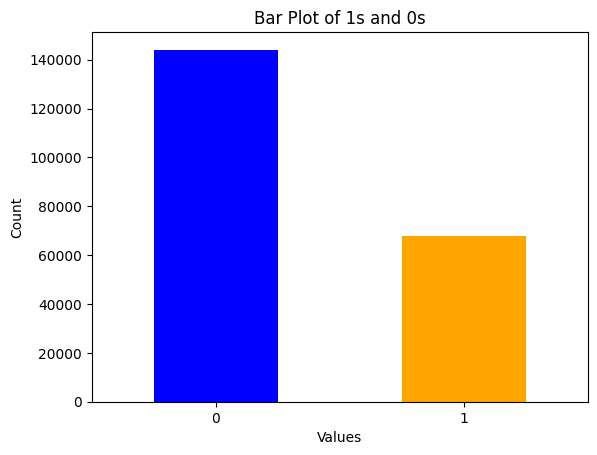

In [5]:
data_set['generated'].value_counts().plot(kind='bar', rot=0, color=['blue', 'orange'])

plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar Plot of 1s and 0s')

plt.show()

In [8]:
df_train_essays_final_shuffled = data_set.sample(frac=1).reset_index(drop=True)
df_train_essays_final = df_train_essays_final_shuffled[100000:180000]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train_essays_final['essay'],df_train_essays_final['generated'])

In [10]:
# df_val = pd.read_csv('/kaggle/input/argugpt/machine-dev.csv')
# # df_val.head()
# df_val['generated'] = 1
# df_val = df_val.drop(columns=['id', 'prompt_id', 'prompt', 'model', 'temperature', 'exam_type', 'score', 'score_level'])
# # df_val.head()
# df_val['tokens'] = df_val['text'].apply(process_text)
# df_val['essay'] = df_val['tokens'].apply(join_tokens)
# val_X = df_val['essay']
# val_y = df_val['generated']

In [11]:
# from transformers import XLNetTokenizer, TFXLNetModel

In [12]:
# # Define XLNet model
# xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
# xlnet_encoder = TFXLNetModel.from_pretrained('xlnet-base-cased')

## Xlnet Usage 

In [13]:
# from transformers import TFXLNetModel, XLNetTokenizer
# xlnet_model = 'xlnet-base-cased'
# xlnet_tokenizer = XLNetTokenizer.from_pretrained(xlnet_model)

In [14]:
# def create_model_xlnet(xlnet_model):
#     word_inputs = tf.keras.Input(shape=(120,), name='word_inputs', dtype='int32')

    
#     xlnet = TFXLNetModel.from_pretrained(xlnet_model)
#     xlnet_encodings = xlnet(word_inputs)[0]

#     # Collect last step from last hidden state (CLS)
#     doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)
    
#     doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)
     
#     outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(doc_encoding)

#     model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])
#     model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

#     return model

In [15]:
# tf.config.run_functions_eagerly(True)
# xlnet = create_model_xlnet(xlnet_model)
# xlnet.summary()

In [16]:
# from tensorflow.keras.utils import plot_model
# plot_model(xlnet, to_file='model_xl.png', expand_nested=True, show_shapes=True)

In [17]:
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [18]:
# from sklearn.model_selection import train_test_split

In [19]:
# X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(df_train_essays_final['essay'],df_train_essays_final['generated'], test_size=0.2, random_state=42)


In [20]:
# # print(type(X_test))

# X_train = X_train_main[:200]
# X_test = X_test_main[:50]
# X_train = X_train.to_frame(name='essay').reset_index(drop=True)
# X_test = X_test.to_frame(name='essay').reset_index(drop=True)

# y_train = y_train_main[:200].reset_index(drop=True)
# y_test = y_test_main[:50].reset_index(drop=True)
# X_train.head(5)

In [21]:
# def bert_encode(data,maximum_length) :
#     input_ids = []
#     attention_masks = []
  

#     for i in range(len(data.essay)):
#         encoded = tokenizer.encode_plus(
        
#         data.essay[i],
#         add_special_tokens=True,
#         max_length=maximum_length,
#         pad_to_max_length=True,
        
#         return_attention_mask=True,
        
#       )
      
#         input_ids.append(encoded['input_ids'])
#         attention_masks.append(encoded['attention_mask'])
#     return np.array(input_ids),np.array(attention_masks)

# train_input_ids,train_attention_masks = bert_encode(X_train,120)
# test_input_ids,test_attention_masks = bert_encode(X_test,120)

In [22]:
# dummy = df_train_essays_final[:100]
# targets = dummy['generated'].values

# dummy2 = df_test
# targets_y = dummy2['generated'].values

In [23]:
# history_xl = xlnet.fit(train_input_ids,targets,validation_data=(test_input_ids,y_train), epochs=4,batch_size=16)

In [24]:
# import torch

In [25]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

# if gpus:
#     # Place the model on the first GPU if available
#     with tf.device('/GPU:0'):
#         xlnet = create_model_xlnet(xlnet_model)
# else:
#     xlnet = create_model_xlnet(xlnet_model)

In [26]:
# history_xl = xlnet.fit(train_input_ids,y_train,validation_data=(test_input_ids,y_test), epochs=4,batch_size=16)

In [27]:
# xlnet.save("xlnet_model.h5")

In [28]:
# from transformers import TFXLNetModel  # Import the necessary custom layer
# import keras

# # Function to load the XLNet model with custom objects
# def load_xlnet_model(model_path):
#     custom_objects = {"TFXLNetModel": TFXLNetModel}
#     loaded_xlnet = keras.models.load_model(model_path, custom_objects=custom_objects)
#     return loaded_xlnet

# # Example usage
# loaded_xlnet = load_xlnet_model("/kaggle/working/xlnet_model.h5")


## Ensembling bert with distilbert 

### Load the saved bert model 

In [6]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [9]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
# Create a new model with the same architecture
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

new_model = tf.keras.Model(inputs=[text_input], outputs=[l])
new_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=METRICS)

# Load the saved weights into the new model
new_model.load_weights('/kaggle/input/llm-detection-cse-472/keras/llm_detect2/1/bert_model.h5')

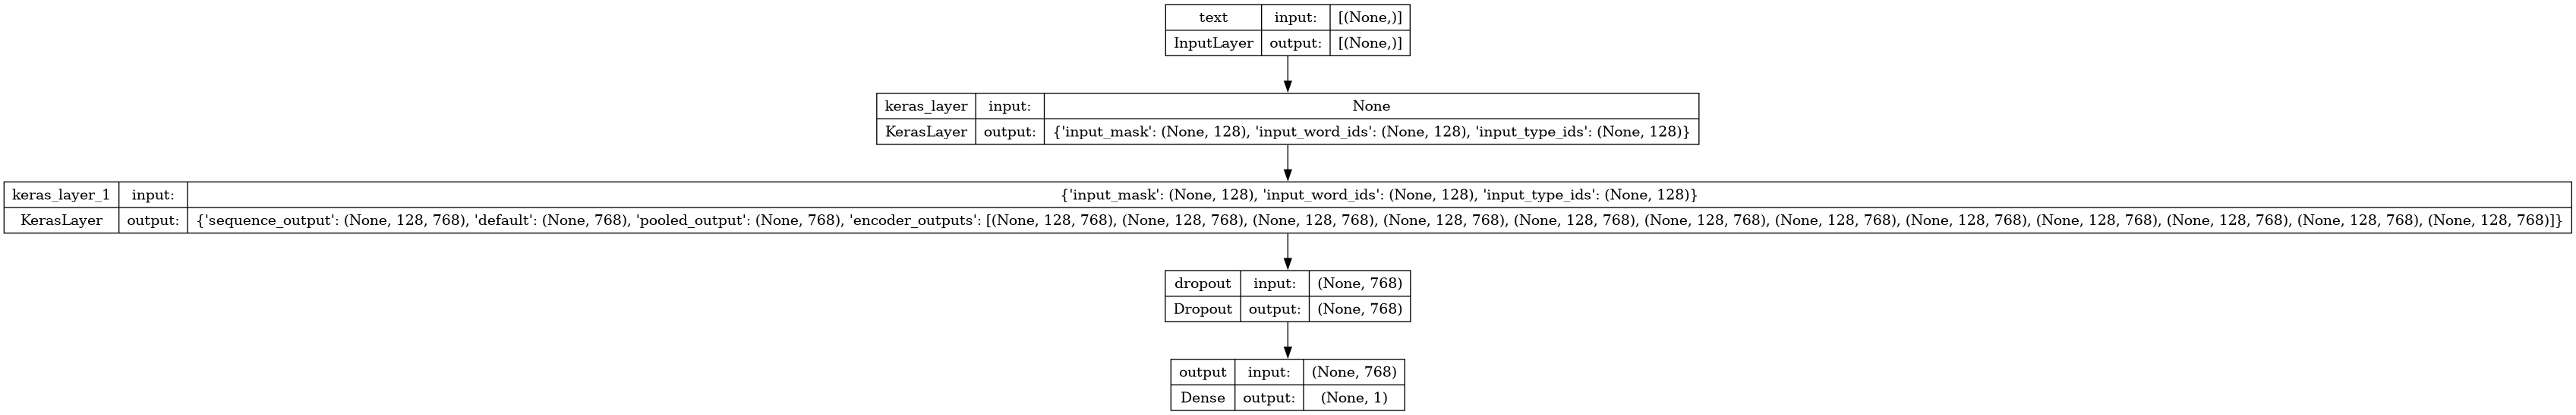

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(new_model, to_file='model_xl.png', expand_nested=True, show_shapes=True)

### Load the saved distilbert model 

In [12]:
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

MODEL_NAME = 'distilbert-base-uncased'
N_EPOCHS = 10

model_distilbert = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)
optimizer = optimizers.Adam(learning_rate=3e-5)
loss_fn  = losses.SparseCategoricalCrossentropy(from_logits=True)
model_distilbert.compile(optimizer=optimizer, loss=loss_fn , metrics=['accuracy'])
model_distilbert.load_weights('/kaggle/input/distilbert-model/model_checkpoint.h5')


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

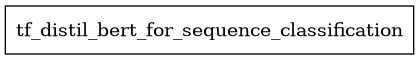

In [13]:
plot_model(model_distilbert, to_file='model_xl.png', expand_nested=True, show_shapes=True)

### Prepare data for distilbert model

In [32]:
def construct_encodings(x, tkzr, trucation=True, padding=True):
    return tkzr(x, truncation=trucation, padding=padding)

def construct_tfdataset(encodings, y=None):
    if y:
        return tf.data.Dataset.from_tensor_slices((dict(encodings),y))
    else:
        # this case is used when making predictions on unseen samples after training
        return tf.data.Dataset.from_tensor_slices(dict(encodings))  

tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

## it will create X,y
def create_tf_set(dataX, dataY, tkzr):
    encodings = construct_encodings(dataX, tkzr)
    tfdataset = construct_tfdataset(encodings, dataY)
    return tfdataset    


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [33]:
X_test_list = X_test.tolist()
y_test_list = y_test.tolist()
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()


In [34]:
tf_test = create_tf_set(X_test_list,y_test_list,tkzr)
tf_train = create_tf_set(X_train_list,y_train_list,tkzr)
BATCH_SIZE = 16
tfdataset_test = tf_test.batch(BATCH_SIZE)
tfdataset_train = tf_train.batch(BATCH_SIZE)

In [35]:
val = model_distilbert.evaluate(tfdataset_test, return_dict=True, batch_size=BATCH_SIZE)
print(val)

1250/1250 [==============================] - 373s 293ms/step - loss: 0.6260 - accuracy: 0.6816
{'loss': 0.6260234117507935, 'accuracy': 0.6816499829292297}


## Ensembling averaging two models' predictions 

In [36]:
preds_model1 = new_model.predict(X_test)
# preds_model2 = loaded_xlnet.predict(test_input_ids)
preds_model2 = model_distilbert.predict(tfdataset_test)
# print(preds_model1.shape)
preds_model2 = preds_model2.logits

# Convert logits to probabilities using softmax
preds_model2 = tf.nn.softmax(preds_model2, axis=-1)
preds_model2 = preds_model2[:, 1].numpy()
preds_model2 = preds_model2.reshape(-1, 1)
# print(preds_model2.shape)
ensemble_preds = (preds_model1 + preds_model2) / 2
# print(ensemble_preds[0])

1250/1250 [==============================] - 367s 292ms/step


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def calc_accuracy(ensemble_preds, y_test):
    
    y_pred = ensemble_preds.flatten()
#     print(y_pred.shape, ensemble_preds.shape)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    # Assuming y_pred and y_test are flattened arrays with 0/1 values
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Accuracy: 90.30%


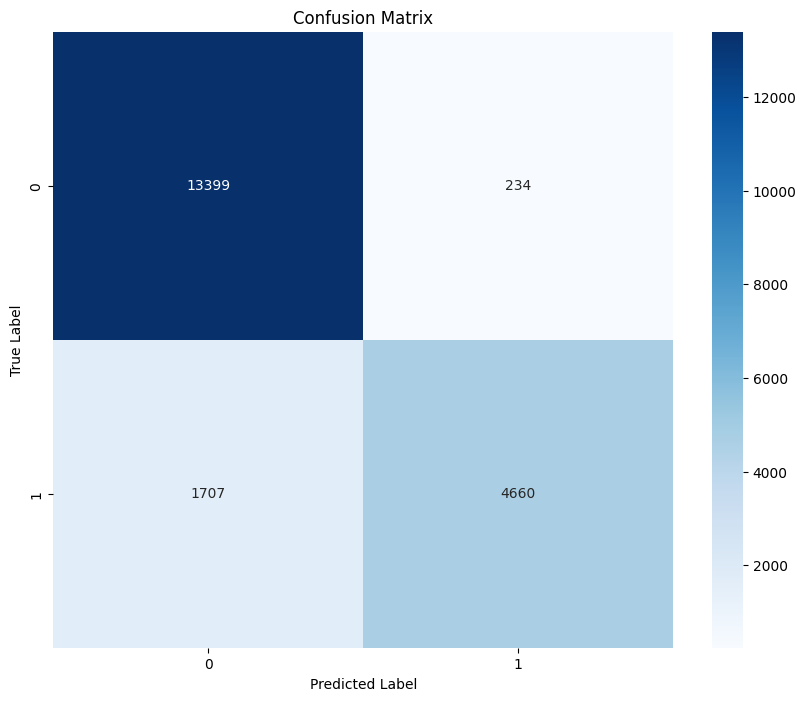

In [38]:
# print(len(y_test), len(ensemble_preds))
calc_accuracy(ensemble_preds, y_test)

## Ensembling using voting 

In [39]:
preds_model1 = (new_model.predict(X_test) > 0.5).astype(int)
# preds_model2 = (loaded_xlnet.predict(test_input_ids) > 0.5).astype(int)
preds_model2 = model_distilbert.predict(tfdataset_test)
# print(preds_model1.shape)
preds_model2 = preds_model2.logits

# Convert logits to probabilities using softmax
preds_model2 = tf.nn.softmax(preds_model2, axis=-1)
preds_model2 = preds_model2[:, 1].numpy()
preds_model2 = preds_model2.reshape(-1, 1)
preds_model2 = (preds_model2 > 0.5).astype(int)
ensemble_preds = (preds_model1 + preds_model2) >= 1

1250/1250 [==============================] - 365s 292ms/step


Accuracy: 92.09%


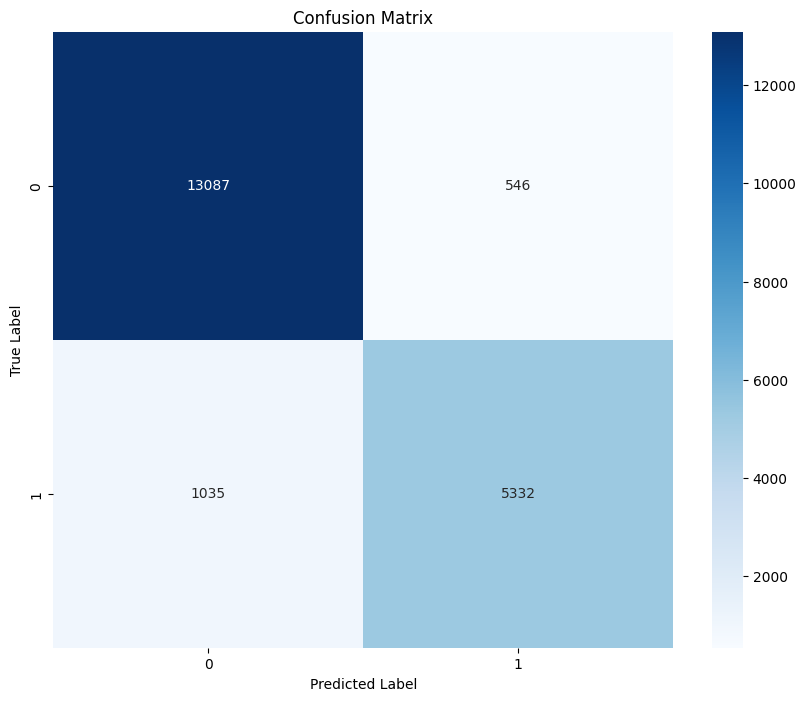

In [40]:
calc_accuracy(ensemble_preds, y_test)

## Ensembling using stacking

In [41]:
# preds_model1_train = new_model.predict(X_train)
# preds_model2_train = loaded_xlnet.predict(train_input_ids)

# meta_model_input = np.concatenate([preds_model1_train, preds_model2_train], axis=1)

# meta_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation='sigmoid', input_dim=2),  # Adjust input_dim based on the number of base models
# ])

# meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# meta_model.fit(meta_model_input, y_train, epochs=10, batch_size=32)

# # Make predictions on test data
# preds_model1_test = new_model.predict(X_test)
# preds_model2_test = loaded_xlnet.predict(test_input_ids)

# meta_model_input_test = np.concatenate([preds_model1_test, preds_model2_test], axis=1)

# ensemble_preds = meta_model.predict(meta_model_input_test)


In [42]:
preds_model1_train = new_model.predict(X_train)
preds_model2_train = model_distilbert.predict(tfdataset_train)
preds_model2_train = preds_model2_train.logits

# Convert logits to probabilities using softmax
preds_model2_train = tf.nn.softmax(preds_model2_train, axis=-1)
preds_model2_train = preds_model2_train[:, 1].numpy()
preds_model2_train = preds_model2_train.reshape(-1, 1)


meta_model_input = np.concatenate([preds_model1_train, preds_model2_train], axis=1)

meta_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_dim=2),  # Adjust input_dim based on the number of base models
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
meta_model.fit(meta_model_input, y_train, epochs=10, batch_size=32)

# Make predictions on test data
preds_model1_test = new_model.predict(X_test)
preds_model2_test = model_distilbert.predict(tfdataset_test)
# print(preds_model1.shape)
preds_model2_test = preds_model2_test.logits

# Convert logits to probabilities using softmax
preds_model2_test = tf.nn.softmax(preds_model2_test, axis=-1)
preds_model2_test = preds_model2_test[:, 1].numpy()
preds_model2_test = preds_model2_test.reshape(-1, 1)

meta_model_input_test = np.concatenate([preds_model1_test, preds_model2_test], axis=1)

ensemble_preds = meta_model.predict(meta_model_input_test)


3750/3750 [==============================] - 1095s 292ms/step
Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6042 - accuracy: 0.6847
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4192 - accuracy: 0.8893
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3173 - accuracy: 0.9143
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2624 - accuracy: 0.9176
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2346 - accuracy: 0.9193
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9194
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2163 - accuracy: 0.9194
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2141 - accuracy: 0.9195
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2132 - accuracy: 0.9194
Epoch 10/10
625/625 

Accuracy: 92.08%


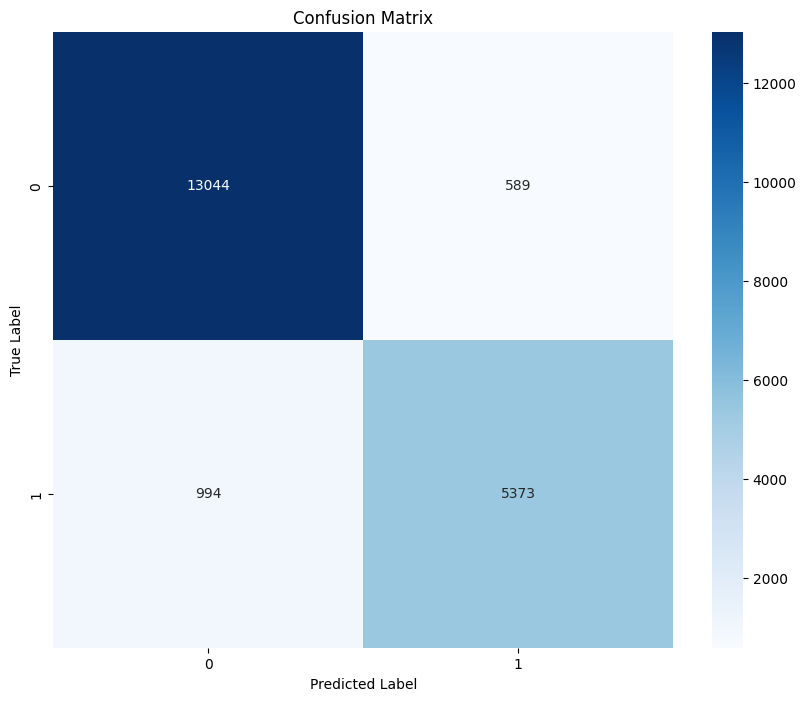

In [43]:
calc_accuracy(ensemble_preds, y_test)